# Clustering Basics

In this example we turn to **unsupervised machine learning**: Given a dataset without predefined labels, our task is to find structure in the data. A typical approach to this problem is **clustering** - find **clusters** of similar datapoints that group together

## Preamble

In [1]:
import pandas
import sklearn
import seaborn

In [2]:
import data_science_learning_paths
data_science_learning_paths.setup_plot_style(dark=True)

## The Iris data set

![Iris versicolor](https://upload.wikimedia.org/wikipedia/commons/d/db/Iris_versicolor_4.jpg)

> The Iris flower data set or "Fisher's Iris data set" is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper _The use of multiple measurements in taxonomic problems_ as an example of linear discriminant analysis.
> 
> The data set consists of 50 samples from each of three species of Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.
> &mdash; ["Iris flower data set," Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)

## Loading the Data

In [3]:
data = data_science_learning_paths.datasets.read_iris()

In [4]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Applying the Clustering Algorithm

In the following we apply the **[k-means clustering algorithm](https://en.m.wikipedia.org/wiki/K-means_clustering)**, a popular choice for getting started with clustering on a new dataset.

In [5]:
from sklearn.cluster import KMeans

As the name says, _k-means clustering_ has one **parameter**, $k$, which is the number of clusters to be detected in the data. The algorithm will place $k$ cluster centers and assign each datapoint to the closest one. In our example, we know that we are looking for three different species of Iris, and in the hope that they can be found as clusters in the measurements, we set $k = 3$:

In [6]:
clusterer = KMeans(n_clusters=3)

The rest of the workflow is standard procedure for ML with Spark: Collect the feature columns into a single feature vector column. Fit the estimator - here, our k-means clustering algorithm. Transform the data with the resulting trained model - the result are cluster labels for each data point.

In [7]:
feature_cols = data.columns.difference(["species"])

In [8]:
clusterer.fit(
    data[feature_cols]
)

KMeans(n_clusters=3)

In [9]:
clustering = clusterer.predict(
    data[feature_cols]
)

In [10]:
clustering

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

## Interpretation

Computing a clustering is the easy part. The bigger data analysis task is still ahead of us: How to evaluate and interpret the result? What does a cluster represent? How well does it match the partition of the data we were trying to find? There are many strategies we can apply, and we only briefly look at some of them.

Like any **centroid clustering** algorithm, the k-Means algorithm defines a cluster as the set of data points close to a central data point, and iteratively tries to find good centers so that the overall distance is minimized. This enables one way of interpreting the result: After the algorithm terminates, the cluster centers can be treated as "typical" and "representative" for their respective cluster. 

In [11]:

centers = clusterer.cluster_centers_
pandas.DataFrame(
    [
        dict(zip(feature_cols, center)) for center in centers
    ],
    columns=feature_cols
)


,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
0,4.393548,1.433871,5.901613,2.748387
1,1.464000,0.244000,5.006000,3.418000
2,5.742105,2.071053,6.850000,3.073684


In this case, we can say that a specimen of the Iris plant from cluster 1 typically has a sepal length of around 5.8 cm, and so on. Let us compare that with the **ground truth** given by the species label:

In [12]:
data.groupby("species").mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
0,5.006,3.418,1.464,0.244
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


### Visualization

In order to inspect the clusters found, we can use data visualization techniques such as **scatter plots**. 

In [13]:
data["cluster"] = clustering

In [14]:
feature_cols = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]

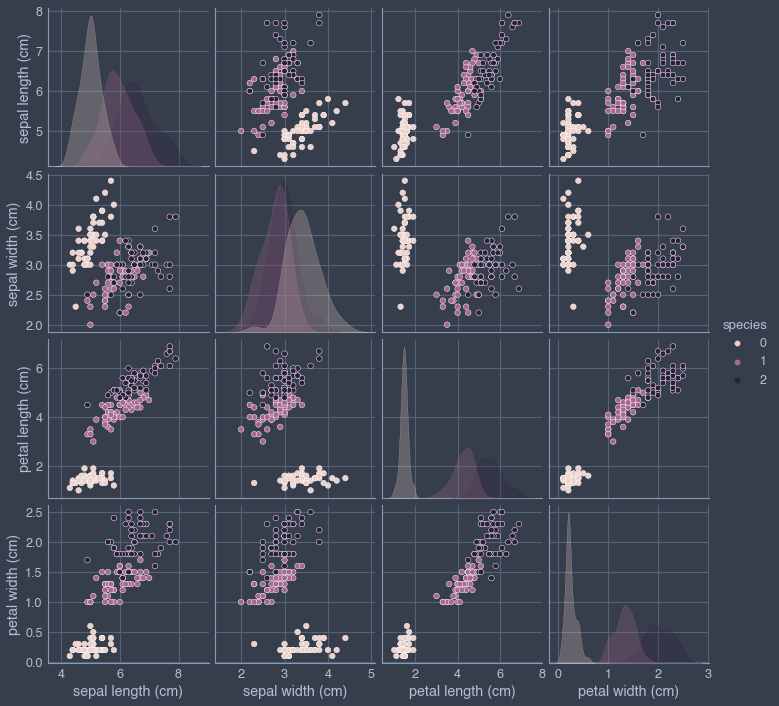

In [15]:
seaborn.pairplot(
    data, 
    hue="species",
    vars=feature_cols
)

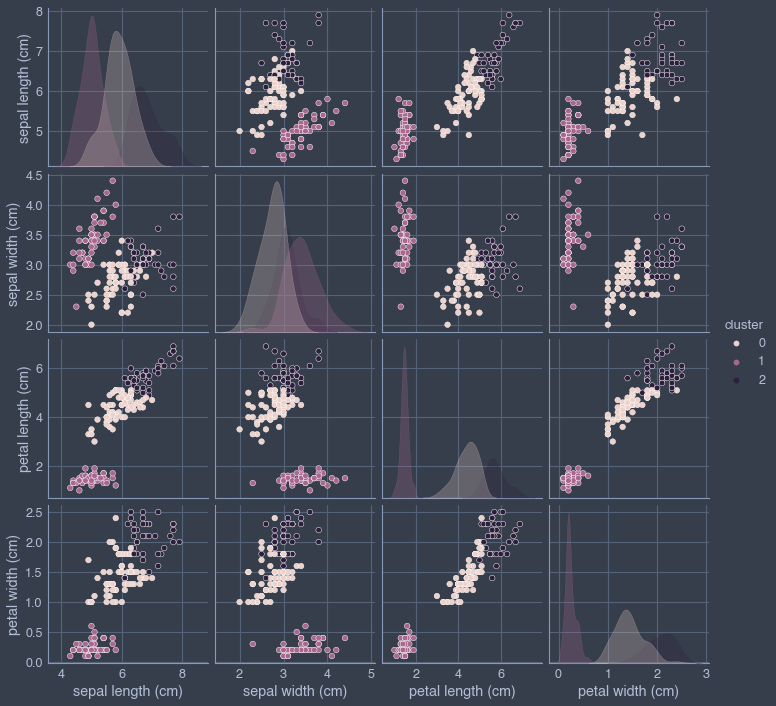

In [16]:
seaborn.pairplot(
    data, 
    hue="cluster",
    vars=feature_cols
)

---
_This notebook is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/). Copyright © 2018-2026 [Point 8 GmbH](https://point-8.de)_

